# My First Convolutional Neural Network : Fashion MNIST
---
#### 실습목표
1. CNN의 기본 아이디어를 안다.
2. CNN의 구조를 그리고, 코드로 옮길 수 있다.

## Real Game : CNN on Fashion MNIST

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [1]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

### Data Loading

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
labels = ["T-shirt/top",  # index 0
            "Trouser",      # index 1
            "Pullover",     # index 2 
            "Dress",        # index 3 
            "Coat",         # index 4
            "Sandal",       # index 5
            "Shirt",        # index 6 
            "Sneaker",      # index 7 
            "Bag",          # index 8 
            "Ankle boot"]   # index 9

print(labels)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


id = 209
다음 그림은 Bag 입니다.


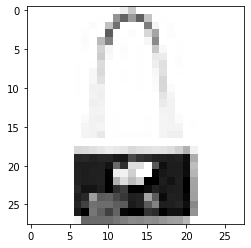

In [9]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')

plt.imshow(test_x[id], cmap='Greys')
plt.show()

### X : Min-Max Scaling

- 최소값 0, 최대값 1로 통일하는 스케일링

In [10]:
max_x = train_x.max()
min_x = train_x.min()

train_x = (train_x - min_x)/(max_x-min_x)
test_x = (test_x - min_x)/(max_x-min_x)


### X : Reshape(# of data, 28, 28, 1)

- **끝에 1을 달아서 그레이스케일(흑백)을 명시해준다.**

In [11]:
train_x.shape

(60000, 28, 28)

In [12]:
_, h, w = train_x.shape

In [13]:
train_x  = train_x.reshape(train_x.shape[0], h, w, 1)
test_x  = test_x.reshape(test_x.shape[0], h, w, 1)


### Y : One-Hot Encoding

In [14]:
from keras.utils import to_categorical

len_y = len(set(train_y))
train_y = to_categorical(train_y, len_y)
test_y = to_categorical(test_y, len_y)


In [15]:
train_y.shape

(60000, 10)

### 코드를 완성해주세요!

- **자유롭게 먼저 해보는 것을 추천**
---
- **구조를 따라서 코딩을 한다면..**

    1. 인풋 레이어
    2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    3. BatchNormalization
    4. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    5. BatchNormalization
    6. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    7. DropOut : 25% 비활성화
    8. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    9. BatchNormalization
    10. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    11. BatchNormalization
    12. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    13. DropOut : 25% 비활성화
    14. Flatten
    15. Fully Connected Layer : 노드 512개
    16. BatchNormalization
    17. 아웃풋 레이어

In [16]:
import tensorflow as tf
from tensorflow import keras

from keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout

In [37]:
# 이전 세션 클리어
keras.backend.clear_session()

il = Input(shape = (28, 28,1))
cl = Conv2D(filters = 32,
            kernel_size = (3,3),
            strides = (1,1),
            padding = 'same',
            activation = 'relu')(il)
bn = keras.layers.BatchNormalization()(cl)
cl = Conv2D(filters = 32,
            kernel_size = (3,3),
            strides = (1,1),
            padding = 'same',
            activation = 'relu')(bn)
bn = keras.layers.BatchNormalization()(cl)
pl = MaxPool2D(pool_size=(2,2), strides = (2,2))(bn)
do = Dropout(.25)(pl)
cl = Conv2D(filters = 64,
            kernel_size = (3,3),
            strides = (1,1),
            padding = 'same',
            activation = 'relu')(do)
bn = keras.layers.BatchNormalization()(cl)
cl = Conv2D(filters = 64,
            kernel_size = (3,3),
            strides = (1,1),
            padding = 'same',
            activation = 'relu')(bn)
bn = keras.layers.BatchNormalization()(cl)
pl = MaxPool2D(pool_size=(2,2), strides = (2,2))(bn)
do = Dropout(.25)(pl)
fl = Flatten()(do)
fcl = Dense(512, activation = 'relu')(fl)
bn = keras.layers.BatchNormalization()(fcl)

ol = Dense(10, activation = 'softmax')(bn)

model = keras.models.Model(il, ol)

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'],
              optimizer = 'adam')


In [17]:
# 이전 세션 클리어
keras.backend.clear_session()
# 모델 생성
model = keras.Sequential()
# 모델 블록 쌓기
model.add(Input(shape = (28, 28, 1)))
model.add(Conv2D(filters = 32,            # 새롭게 제작하려는 feature map의 수
                 kernel_size = (3, 3),    # 훑는 필터의 가로 세로 사이즈
                 strides = (1, 1),        # 필터가 훑기 이전 사이즈를 유지하려는 기법
                 padding = 'same',        # 기본적으로 한 칸씩 이동하며 훑는다
                 activation = 'relu'))    # 주의!
model.add(BatchNormalization())
model.add(Conv2D(filters = 32,
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = 'same',
                 activation = 'relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),      # pooling filter의 가로 세로 사이즈
                    strides=(2, 2)))      # pooling filter가 어떻게 이동할 것인지
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64,
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = 'same',
                 activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64,
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = 'same',
                 activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'softmax'))
# 모델 컴파일
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'],
              optimizer = 'adam')
# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        

### Early Stopping을 활용한 학습

- 조건
    1. validation_split = 0.2
    2. 1 epochs만 관찰해가며 속도가 가장 빠른 batch_size 찾아보기. 128개부터 시작하여 조절해볼 것.
    3. EarlyStopping. val_loss가 5 epoch 전과 비교하여 개선되지 않으면 스탑
    4. 이미지 시각화를 위해 hist 변수에 학습 과정을 넣어주세요.

In [20]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_loss',
                   min_delta = 0,
                   patience = 5,
                   restore_best_weights = True)

In [21]:
hist = model.fit(train_x, train_y, callbacks=[es], epochs = 128, validation_split=0.2)

Epoch 1/128
1500/1500 [==============================] - 22s 7ms/step - loss: 0.4218 - accuracy: 0.8524 - val_loss: 0.2962 - val_accuracy: 0.8941
Epoch 2/128
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2838 - accuracy: 0.8976 - val_loss: 0.2553 - val_accuracy: 0.9099
Epoch 3/128
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2460 - accuracy: 0.9104 - val_loss: 0.2263 - val_accuracy: 0.9205
Epoch 4/128
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2205 - accuracy: 0.9183 - val_loss: 0.2161 - val_accuracy: 0.9204
Epoch 5/128
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1999 - accuracy: 0.9273 - val_loss: 0.2107 - val_accuracy: 0.9258
Epoch 6/128
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1825 - accuracy: 0.9331 - val_loss: 0.2208 - val_accuracy: 0.9222
Epoch 7/128
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1639 - accuracy: 0.9390 - val_loss: 0.1981 - val_a

### 이미지 시각화

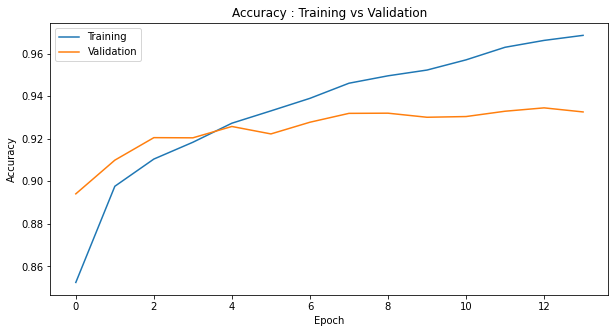

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

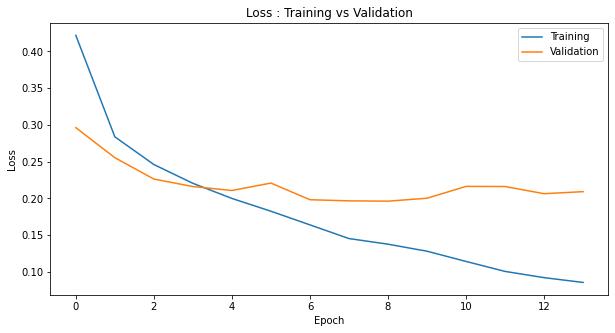

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [24]:
y_pred = model.predict(test_x)
y_pred.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [25]:
single_y_pred = y_pred.argmax(axis=1)
single_y_pred.shape

(10000,)

In [26]:
print(test_y.shape)
single_test_y = test_y.argmax(axis=1)
print(single_test_y.shape)

(10000, 10)
(10000,)


In [27]:
test_acc = accuracy_score(single_test_y, single_y_pred)

print(f'테스트셋 정확도 : {test_acc*100:.2f}%' )

테스트셋 정확도 : 92.95%


id = 6002
다음 그림은 숫자 6 입니다.
모델의 예측 : 6
모델의 카테고리별 확률 : [ 0.  0.  0.  0.  5.  0. 93.  0.  0.  0.]
정답입니다


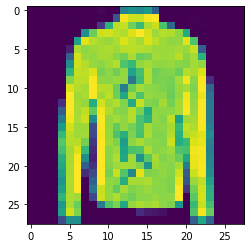

In [39]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {single_test_y[id]} 입니다.')
print(f'모델의 예측 : {single_y_pred[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(y_pred[id]*100)}')

if single_test_y[id] == single_y_pred[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()

id = 4850
다음 그림은 숫자 9 입니다.
모델의 예측 : 7
모델의 카테고리별 확률 : [ 0.  0.  0.  0.  0.  0.  0. 97.  0.  2.]
틀렸어요


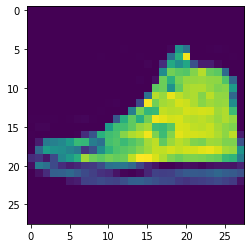

In [34]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (single_test_y==single_y_pred)
f_id = np.where(true_false==False)[0]        # 틀린 것들의 인덱스 반환
f_n = len(f_id)                              # 틀린 것들이 총 몇 개나 될까?

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}')
print(f'다음 그림은 숫자 {single_test_y[id]} 입니다.')
print(f'모델의 예측 : {single_y_pred[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(y_pred[id]*100)}')

if single_test_y[id] == single_y_pred[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()